# Atividade #05

#### Estatística descritiva e Visualização de dados

Para realização da atividade foi escolhido o conjunto de dados:
**"Adult Data Set"**

In [1]:
#importando bibliotecas

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## Descrição dos dados

In [2]:
#Carregamento de dados

df_adultData = pd.read_csv("../../data/external/adultData.csv", delimiter = ",")

df_adultNames = pd.read_csv("../../data/external/adultNames.csv", delimiter = "\t")

In [3]:
# Visualizando parcial dos dados dataset Adulto

df_adultData.head(15)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# Visualizando últimas 15 linhas do dataset Nomes

df_adultNames.tail(15)

,| This data was extracted from the census bureau database found at
91,">50K, <=50K."
92,age: continuous.
93,"workclass: Private, Self-emp-not-inc, Self-emp..."
94,fnlwgt: continuous.
95,"education: Bachelors, Some-college, 11th, HS-g..."
96,education-num: continuous.
97,"marital-status: Married-civ-spouse, Divorced, ..."
98,"occupation: Tech-support, Craft-repair, Other-..."
99,"relationship: Wife, Own-child, Husband, Not-in..."
100,"race: White, Asian-Pac-Islander, Amer-Indian-E..."


In [5]:
# extração do dicionário de dados
df_dict_dados = df_adultNames.tail(14)

# transformação dos valores
lista_dict_dados = df_dict_dados.values.tolist()

i = 0
lista_passagem = []
for n in lista_dict_dados:
    x = lista_dict_dados[i][0].split(":")
    lista_passagem.append(x)
    i += 1

c=0
dict_dados = {}
for m in lista_passagem:
    dict_dados [lista_passagem[c][0]] = lista_passagem[c][1]
    c += 1

for a in dict_dados:    
    if dict_dados[a] == " continuous.":
        dict_dados[a] = "continuo"
    else:
        dict_dados[a] = "nominal"

# adicionando item ao dicionário
dict_dados['US_year'] = "binario"

# transformando dicionário em dataframe
df_dict_dados = pd.DataFrame(list(dict_dados.items()), columns = ['Variavel', 'Tipo'])

# exibindo dicionário de dados
df_dict_dados.head(15)

,Variavel,Tipo
0,age,continuo
1,workclass,nominal
2,fnlwgt,continuo
3,education,nominal
4,education-num,continuo
5,marital-status,nominal
6,occupation,nominal
7,relationship,nominal
8,race,nominal
9,sex,nominal


In [6]:
lista_colunas = df_dict_dados["Variavel"].values.tolist()

df_adultData.columns = lista_colunas

df_adultData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,US_year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
# estatísticas relevantes sobre os dados

round(df_adultData.describe(include = 'all'))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,US_year
count,32560.0,32560,32560.0,32560,32560.0,32560,32560,32560,32560,32560,32560.0,32560.0,32560.0,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,39.0,NaN,189782.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1078.0,87.0,40.0,NaN,NaN
std,14.0,NaN,105550.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,7385.0,403.0,12.0,NaN,NaN
min,17.0,NaN,12285.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
25%,28.0,NaN,117832.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
50%,37.0,NaN,178363.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
75%,48.0,NaN,237054.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,45.0,NaN,NaN


In [8]:
# informações gerais sobre o dataset 

df_adultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  US_year         32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# validação: inexistência de valores nulos

df_adultData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
US_year           0
dtype: int64

In [10]:
# validação: inexistência de não informados

df_adultData.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
US_year           0
dtype: int64

In [11]:
# exibição de linhas e colunas do tipo 'int64' 

df_adultData.select_dtypes(include=['int64']).head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
5,49,160187,5,0,0,16
6,52,209642,9,0,0,45
7,31,45781,14,14084,0,50
8,42,159449,13,5178,0,40
9,37,280464,10,0,0,80


In [12]:
# exibição de linhas e colunas do tipo 'object'

df_adultData.select_dtypes(include=['object']).head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,US_year
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
5,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
7,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
8,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
9,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,>50K


## Perguntas de partida e Hipóteses

### Peguntas

Os dados estatísticos referem-se a censo demográfico, com estudo demasiadamente longo e profundo, englobando a população alvo.
Com base nessa premisssa, podem ser extraídas algumas correlações importantes:
    a. Dados qualitativos e dados quantitativos podem ser extraídos do conjunto de dados?
    b. Podem ser feitas correlações entre os atributos?
    c. Há falta de integridade dos dados que seja prejudicial às análises?

### Hipóteses

Analisando os dados pelas informações até então colhidas e produzidas, os dados estão integros e aptos a gerar resultados relevantes.
Ademais, podem ser correlacionados os campos para obtenção de relevantes informações sobre renda, escolaridade, gênero, entre outros.
Por fim, dados quantiativos e qualitativos podem ser extraídos, contribuindo para uma análise adequada do conjunto de dados.

## Insights

Muitas relações podem ser obtidas dos dados acima apresentados. Dentre elas, por exemplo, gênero, escolaridade, nacionalidade e grau de escolaridade, podem ser confrontadas entre si, com informações sobre renda anual, ganho e perda de capital, ou ainda entre o número de pessoas. 

Como exemplo, o histograma abaixo, que correlaciona o número de pessoas e a renda anual em dólares.

Observa-se que maior parte da população recebe menos de 50.000 (cinquenta mil) dólares anuais.

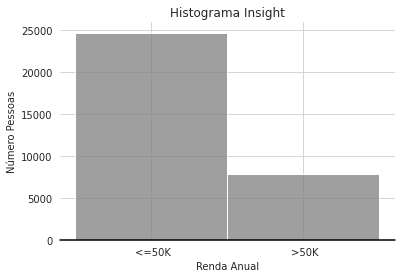

In [13]:
sns.set_style("whitegrid")

ax = sns.histplot(data=df_adultData, x='US_year', color = 'grey')
plt.ylabel('Número Pessoas')
plt.xlabel('Renda Anual')
plt.title('Histograma Insight')


ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()